# Qiskit Terra

In [1]:
from qiskit import version
version._get_qiskit_versions()

{'qiskit': '0.11.0',
 'qiskit-terra': '0.8.2',
 'qiskit-ignis': '0.1.1',
 'qiskit-aer': '0.2.3',
 'qiskit-ibmq-provider': '0.3.0',
 'qiskit-aqua': '0.5.2'}

### Example : 5 qubit GHZ states

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute

# Create a Quantum Register with 3 qubits.
qr = QuantumRegister(5, 'q')
# Create a Classical Register with 5 bits.
cr = ClassicalRegister(5, 'c')
# Create a Quantum Circuit acting on the q register
Q_ghz = QuantumCircuit(qr,cr)


Q_ghz.h(qr[2])
Q_ghz.cx(qr[2], qr[1])
Q_ghz.cx(qr[1], qr[0])
Q_ghz.cx(qr[2], qr[3])
Q_ghz.cx(qr[3], qr[4])
Q_ghz.barrier(qr)
Q_ghz.measure(qr, cr)

### The circuit you think:


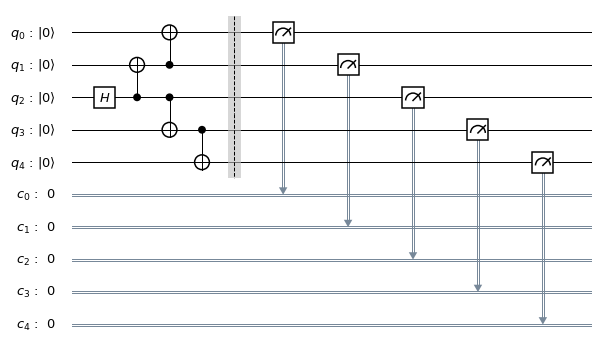

In [3]:
%matplotlib inline
Q_ghz.draw(output='mpl',scale=0.5)

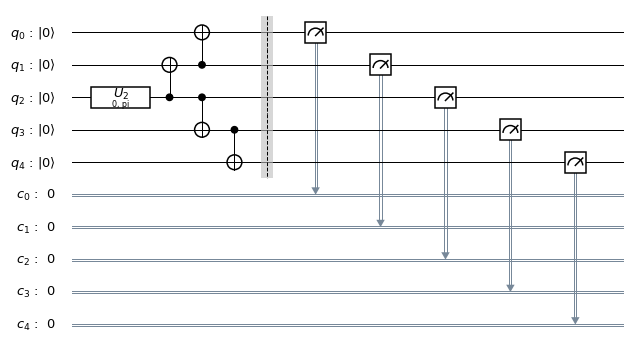

In [4]:
from qiskit.compiler import transpile
trans_circ = transpile(Q_ghz, basis_gates=['u1', 'u3', 'u2', 'cx'])
trans_circ.draw(output='mpl',scale=0.5)

In [ ]:
print('gates = ', trans_circ.count_ops())
print('depth = ', trans_circ.depth())

gates =  {'u2': 1, 'cx': 4, 'barrier': 1, 'measure': 5}
depth =  5


# Transpiler

### Check the account and select device and add transpiler

In [ ]:
from pprint import pprint
from qiskit import IBMQ
account_api='10020ff2a93a8771e98f6b0a4962ff796fd7096ce3b048372b11cdf5ea3b7b460f22798be9d7670f9af12933740dc50f1ca2244298381ed05db4abd553c37ef2'
IBMQ.save_account(account_api,overwrite=True)
IBMQ.load_account()
print('Available Providers: ')
pprint(IBMQ.providers())
print('Available Device: ')
pprint(IBMQ.get_provider(hub='ibm-q').backends())

Available Providers: 
[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-hub-ntu', group='ntu-internal', project='default')>]
Available Device: 
[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx4') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>]


In [ ]:
device_QC = IBMQ.get_provider(hub='ibm-q').get_backend('ibmq_16_melbourne')
device_QC.status()

BackendStatus(backend_name='ibmq_16_melbourne', backend_version='1.0.0', operational=True, pending_jobs=54, status_msg='active')

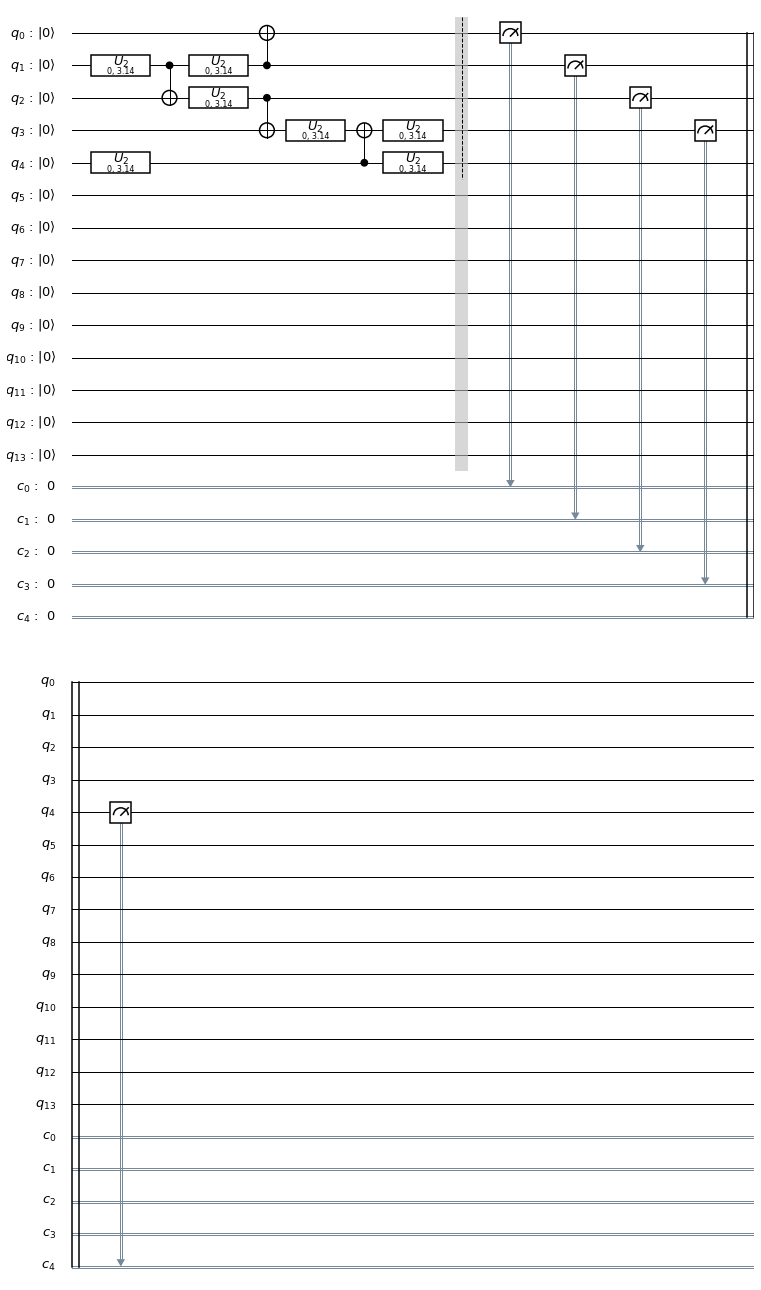

In [ ]:
trans_ghz_default = transpile(Q_ghz, device_QC)
trans_ghz_default.draw(output='mpl',scale=0.5)

In [ ]:
print('gates = ', trans_ghz_default.count_ops())
print('depth = ', trans_ghz_default.depth())
print('total gate use: ',trans_ghz_default.size())

gates =  {'u2': 7, 'cx': 4, 'barrier': 1, 'measure': 5}
depth =  8
total gate use:  16


In [ ]:
## Properties of backends
from qiskit.tools.jupyter import *
%qiskit_backend_monitor device_QC

C:\Users\HCL\Anaconda3\envs\Qiskit\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:531: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)


In [ ]:
#layout = {qr[0]: 10, qr[1]: 4, qr[2]: 5, qr[3]: 6, qr[4]: 8}
layout = [10, 4, 5, 6, 8]

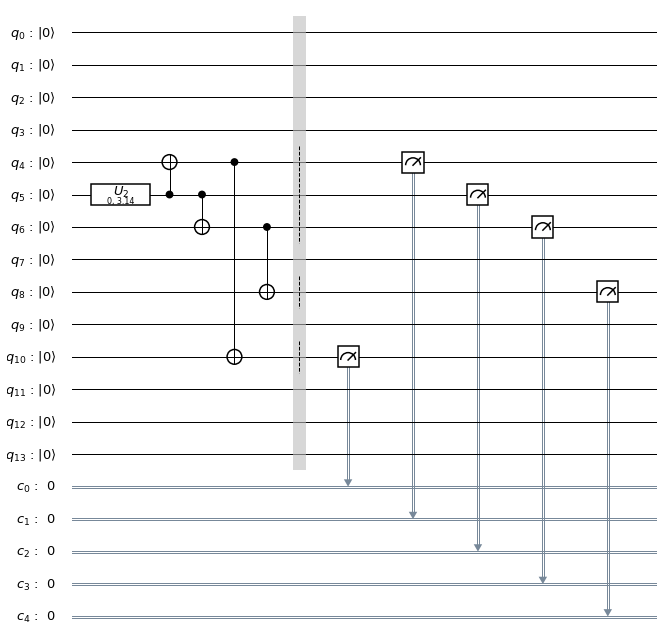

In [ ]:
trans_mapped = transpile(Q_ghz, device_QC, initial_layout=layout)
trans_mapped.draw(output='mpl',scale=0.5)

In [ ]:
from qiskit.tools.monitor import job_monitor
job = execute([trans_ghz_default, trans_mapped], device_QC)
job_monitor(job)
res = job.result()

Job Status: job is queued (55)      

### Comparasion Results (Exercise)

Q: Compare the results of simulator, default_map and layout mapping (by your self)